In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import os


In [2]:
print(os.getcwd()) #os.setwd(PATH)
data=pd.read_csv('Store.csv',sep=',',header=0, encoding="latin")

C:\Users\ROG\Desktop\contact session 1\contact session 1\code and datasets\Pandas


In [10]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,6/13/2013,6/17/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,1/22/2011,1/24/2011,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,2/27/2014,3/4/2014,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# Let's get the number of rows ans columns in this data frame 

In [15]:
res = data.shape
res
print(type(res))
print("The number of rows are : ",res[0])

<class 'tuple'>
The number of rows are :  9994


# Lets get all the column names and convert it to a list

In [19]:
cols = data.columns
print(type(cols))
#print(data.columns.tolist())
list=data.columns.tolist()
print(list)
type(list)

<class 'pandas.core.indexes.base.Index'>
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


list

# Data Manipulation tasks:
- Filtering data
- Selecting columns 
- Sorting data
- Adding new columns
- Group By aggregations
- Handling dates
- Handling time
- Merging dataframes
- Treating Missing Values



# Finding out how many cities are the orders being delivered to

In [26]:
print(len(data['City'].unique().tolist()))

#Note : we are converting the above output to a list , by default it would be in array format 

531


# In the below query, we are trying to find out how many unique cities are the packages delivered. 

In [23]:
cities_uniq = (data['City'].unique()) # Note : The default type is array, unless u convert it to a list
print(type(cities_uniq))
len(cities_uniq)

<class 'numpy.ndarray'>


531

# In class exercise :
Write a code snippet to find out if there was any instances of packages delivered to New Jersey



In [48]:
print(len(data[data['City']=='New Jersey']))

0


# How many times orders were shipped to the east region ?


1)We need to get only those rows pertaining to the EAST zone 
2)Count the number of rows from the result of the above query 

In [50]:

data[data['Region']=="East"] # This is getting only the east zone rows 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
23,24,US-2014-156909,7/17/2014,7/19/2014,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
27,28,US-2012-150630,9/17/2012,9/21/2012,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
28,29,US-2012-150630,9/17/2012,9/21/2012,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.618,2,0.7,-7.0532
29,30,US-2012-150630,9/17/2012,9/21/2012,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.200,3,0.2,15.5250
30,31,US-2012-150630,9/17/2012,9/21/2012,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,3.264,2,0.2,1.1016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9968,9969,CA-2014-153871,12/12/2014,12/18/2014,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Plainfield,...,7060,East,OFF-BI-10004600,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,735.980,2,0.0,331.1910
9969,9970,CA-2014-153871,12/12/2014,12/18/2014,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Plainfield,...,7060,East,OFF-AP-10003622,Office Supplies,Appliances,"Bravo II Megaboss 12-Amp Hard Body Upright, Re...",22.750,7,0.0,6.5975
9981,9982,CA-2014-163566,8/4/2014,8/7/2014,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,...,45014,East,OFF-LA-10004484,Office Supplies,Labels,Avery 476,16.520,5,0.2,5.3690
9984,9985,CA-2012-100251,5/17/2012,5/23/2012,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200


In [52]:
data[data['Region']=="East"].shape[0] # This will give the number of rows in the above data frame


2848

In [10]:
# Detailed way of understanding the above query 
d1 = data.query("Region=='East'") # This is filtering out rows based on condition(Region==East)
print(type(d1))
print("The number of times the product being shipped to EAST zone is ",d1.shape[0])
print(d1)


<class 'pandas.core.frame.DataFrame'>
The number of times the product being shipped to EAST zone is  2848
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
23        24  US-2014-156909   7/17/2014   7/19/2014    Second Class   
27        28  US-2012-150630   9/17/2012   9/21/2012  Standard Class   
28        29  US-2012-150630   9/17/2012   9/21/2012  Standard Class   
29        30  US-2012-150630   9/17/2012   9/21/2012  Standard Class   
30        31  US-2012-150630   9/17/2012   9/21/2012  Standard Class   
...      ...             ...         ...         ...             ...   
9968    9969  CA-2014-153871  12/12/2014  12/18/2014  Standard Class   
9969    9970  CA-2014-153871  12/12/2014  12/18/2014  Standard Class   
9981    9982  CA-2014-163566    8/4/2014    8/7/2014     First Class   
9984    9985  CA-2012-100251   5/17/2012   5/23/2012  Standard Class   
9985    9986  CA-2012-100251   5/17/2012   5/23/2012  Standard Class   

     Customer ID     Customer

# How to figure out the total quantity of products shipped to the east zone ?

There are 3 parts to this question 
1)Find out only those rows pertaining to EAST zone 
2)Get only the quantity column 
3)Obtain the sum of the values in the quantity column 

In [58]:
data.query('Region=="East"')['Quantity'] # This will give us only the quantity column values

23       2
27       7
28       2
29       3
30       2
        ..
9968     2
9969     7
9981     5
9984    10
9985     4
Name: Quantity, Length: 2848, dtype: int64

In [59]:
data.query("Region=='East'")['Quantity'].sum()



10618

# Note : A simpler way to understand the above query would be to save the intermediate result of every into a data frame 

east_region = data.query("Region=='East'")

east_quant = east_region['Quantity']

print(east_quant.sum())

The above looks easier to understand during the learning phase, but its a bad practice during 
scenario, since it occupies space in the memory each time the result of a query is saved in a data frame 

In [13]:
east_region = data.query("Region=='East'")
east_quant = east_region['Quantity']
print(type(east_quant)) # Prior to applying the sum() function on any object , check the data type 
print(east_quant.sum()) 



<class 'pandas.core.series.Series'>
10618


# In class exercise 
Identify the cities in the east zone to which the packages were delivered.
Note : Do not display the repeated cities in the output 


In [66]:
data.query('Region=="East"')['City'].unique().tolist()

['Philadelphia',
 'Dover',
 'New York City',
 'Troy',
 'Columbus',
 'Wilmington',
 'Newark',
 'Fairfield',
 'Hamilton',
 'Westfield',
 'Akron',
 'Medina',
 'Dublin',
 'Morristown',
 'Cincinnati',
 'Belleville',
 'Lakewood',
 'Hackensack',
 'Lowell',
 'Manchester',
 'Franklin',
 'Warwick',
 'Lawrence',
 'New Rochelle',
 'Auburn',
 'Lindenhurst',
 'Rochester',
 'Springfield',
 'Grove City',
 'Plainfield',
 'Cleveland',
 'Chester',
 'Mount Vernon',
 'Oceanside',
 'Lorain',
 'Linden',
 'New Brunswick',
 'Lancaster',
 'Concord',
 'Columbia',
 'Norwich',
 'Toledo',
 'Washington',
 'Yonkers',
 'Clinton',
 'Cuyahoga Falls',
 'Rockville',
 'Buffalo',
 'Long Beach',
 'Providence',
 'Middletown',
 'Freeport',
 'Parma',
 'New Bedford',
 'Vineland',
 'Niagara Falls',
 'Allentown',
 'Bridgeton',
 'Everett',
 'Watertown',
 'Bayonne',
 'Baltimore',
 'Meriden',
 'Bristol',
 'Reading',
 'Paterson',
 'Leominster',
 'Perth Amboy',
 'York',
 'Quincy',
 'Kent',
 'Marion',
 'Burlington',
 'Bangor',
 'Malden'

# In class exercise 
Figure out the number of cities in each zone to which the packages are delivered

# Note : Do not assume that the packages are delivered only to N,S,E & W zone. The data set could contain 
North-East, South-West zones as well. It's not a good practice to manually view the data in 
excel sheet (production data sets could be too large to be opened)

It's expected that you come up with the logic of figuring out how many unique zones the packages are 
shipped and then you might want to answer the above question. 


In [75]:
len(data.query('Region==("East","West","North","South")')['City'].unique())

376

In [19]:
## Sorting data

# Which are the most valuable customers in South Region by Sales?
data.query("Region=='South'").sort_values('Sales',ascending=False).head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2011-145317,3/18/2011,3/23/2011,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
8488,8489,CA-2013-158841,2/2/2013,2/4/2013,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,...,22204,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,5,0.0,2799.9840
683,684,US-2014-168116,11/5/2014,11/5/2014,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
509,510,CA-2012-145352,3/16/2012,3/22/2012,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,...,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750
4297,4298,CA-2014-129021,8/24/2014,8/27/2014,Second Class,PO-18850,Patrick O'Brill,Consumer,United States,Tallahassee,...,32303,South,TEC-PH-10001459,Technology,Phones,Samsung Galaxy Mega 6.3,4367.896,13,0.2,327.5922


# How to identify the top 10 customers in the south region (top 10 in terms of sale amount ) ?

In [20]:
south_data = data.query("Region=='South'")
type(south_data)

sorted_south = south_data.sort_values('Sales',ascending=False) # Sort the data frame on sales column
print(sorted_south.loc[:,('Customer ID','Customer Name','Sales')].head(10)) # We only want specific columns 
                        

     Customer ID         Customer Name      Sales
2697    SM-20320           Sean Miller  22638.480
8488    SE-20110          Sanjit Engle   8749.950
683     GT-14635        Grant Thornton   7999.980
509     CM-12385  Christopher Martinez   6354.950
4297    PO-18850       Patrick O'Brill   4367.896
9639    JH-15985           Joseph Holt   4297.644
3280    GM-14695          Greg Maxwell   4164.050
7583    KH-16690      Kristen Hastings   3499.930
4093    KW-16435       Katrina Willman   3080.000
1454    MC-17425          Mark Cousins   3040.000


In [89]:
# An optimized way of doing the above would be as follows 

data.query("Region=='South'").sort_values('Sales',ascending=False).loc[:,('Customer ID','Customer Name','Sales')].head(10)

,Customer ID,Customer Name,Sales
2697,SM-20320,Sean Miller,22638.480
8488,SE-20110,Sanjit Engle,8749.950
683,GT-14635,Grant Thornton,7999.980
509,CM-12385,Christopher Martinez,6354.950
4297,PO-18850,Patrick O'Brill,4367.896
9639,JH-15985,Joseph Holt,4297.644
3280,GM-14695,Greg Maxwell,4164.050
7583,KH-16690,Kristen Hastings,3499.930
4093,KW-16435,Katrina Willman,3080.000
1454,MC-17425,Mark Cousins,3040.000


In [90]:
# In the East Region who are the most profitable customers?
data.query("Region=='East'").sort_values('Sales',ascending=False).loc[:,('Customer ID','Customer Name','Sales')].head(10)

,Customer ID,Customer Name,Sales
2623,TA-21385,Tom Ashbrook,11199.968
4190,HL-15040,Hunter Lopez,10499.970
4277,BS-11365,Bill Shonely,9099.930
6425,CC-12370,Christopher Conant,8399.976
6626,TB-21400,Tom Boeckenhauer,6999.960
7666,DR-12940,Daniel Raglin,5399.910
6340,TS-21370,Todd Sumrall,5199.960
1085,KD-16270,Karen Daniels,4899.930
1803,JA-15970,Joseph Airdo,4663.736
8204,KD-16495,Keith Dawkins,4643.800


# In class exercise : Figure out the bottom 3 (least ranked customers based on the sale amount) for all the zones


In [140]:
central=data.query('Region=="Central"').sort_values('Sales',ascending=False).loc[:,('Customer ID','Customer Name','Sales')].tail(3)
west=data.query('Region=="West"').sort_values('Sales',ascending=False).loc[:,('Customer ID','Customer Name','Sales')].tail(3)
north=data.query('Region=="North"').sort_values('Sales',ascending=False).loc[:,('Customer ID','Customer Name','Sales')].tail(3)
south=data.query('Region=="South"').sort_values('Sales',ascending=False).loc[:,('Customer ID','Customer Name','Sales')].tail(3)
east=data.query('Region=="East"').sort_values('Sales',ascending=False).loc[:,('Customer ID','Customer Name','Sales')].tail(3)
#print(datanew['']=='["central"],["west"],["north"],["south"],["east"]')
print('central','\n\n',repr(central),'\n\n','west','\n\n',repr(west),'\n\n','south','\n\n',repr(south),'\n\n','east','\n\n',repr(east),'\n\n','north','\n\n',repr(north))

central 

      Customer ID     Customer Name  Sales
8658    KB-16600       Ken Brennan  0.836
9292    RS-19765    Roland Schwarz  0.556
4101    ZC-21910  Zuschuss Carroll  0.444 

 west 

      Customer ID     Customer Name  Sales
976     TD-20995     Tamara Dahlen   1.08
4933    ZC-21910  Zuschuss Carroll   1.08
2761    NK-18490      Neil Knudson   0.99 

 south 

      Customer ID     Customer Name  Sales
6597    SV-20785  Stewart Visinsky  1.365
9382    CC-12670    Craig Carreira  1.344
2605    KN-16450       Kean Nguyen  1.167 

 east 

      Customer ID    Customer Name  Sales
5206    TM-21010   Tamara Manning  1.240
1685    DK-12835  Damala Kotsonis  1.188
4711    JO-15280    Jas O'Carroll  0.852 

 north 

 Empty DataFrame
Columns: [Customer ID, Customer Name, Sales]
Index: []


# Understanding groupby  

In [135]:
smalldata=pd.read_csv('small_store.csv',sep=',',header=0, encoding="latin")
#Note : small_store.csv contains the same data as Store.csv but a few columns have been deleted to 
# make it leaner so that the columns will be readable in a single window 
print(smalldata.head())

  Customer ID             City       State Region     Sales
0    CG-12520        Henderson    Kentucky  South  261.9600
1    CG-12520        Henderson    Kentucky  South  731.9400
2    DV-13045      Los Angeles  California   West   14.6200
3    SO-20335  Fort Lauderdale     Florida  South  957.5775
4    SO-20335  Fort Lauderdale     Florida  South   22.3680


In [137]:
# I would like to display the result grouped by state 
state_group=smalldata.groupby('State')
print(type(state_group)) 
# Note : the result saved in state_group is not a data frame, hence cannot direclty print

print(state_group.groups)
    

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
{'Alabama': Int64Index([  79,   80,  533,  534, 1269, 1431, 1432, 1433, 1451, 1452, 1453,
            1454, 1577, 1975, 1976, 1977, 2013, 2014, 2015, 2186, 2197, 2739,
            2740, 2833, 2834, 3267, 3268, 3447, 3481, 3499, 3500, 3501, 3702,
            3703, 3704, 3705, 3816, 3817, 3818, 4921, 4922, 4923, 4924, 4936,
            5516, 5555, 5926, 6254, 6823, 6824, 6922, 6923, 7150, 7653, 8337,
            8338, 8342, 8553, 9010, 9489, 9669],
           dtype='int64'), 'Arizona': Int64Index([  67,   68,  126,  127,  151,  152,  372,  373,  374,  375,
            ...
            9433, 9434, 9435, 9540, 9644, 9645, 9646, 9653, 9654, 9959],
           dtype='int64', length=224), 'Arkansas': Int64Index([ 495,  961, 1121, 1122, 1123, 1124, 1125, 1126, 2200, 2201, 2530,
            2531, 2532, 2533, 2641, 2797, 2798, 2799, 3848, 3849, 3895, 4088,
            5233, 5275, 5276, 5386, 5531, 5532, 5533, 5534, 5535, 5536, 5537,
          

# Interpreting the above result 

'Alabama': Int64Index([  79,   80,  533,  534, 1269, 1431, 1432, 1433, 1451, 1452, 1453,
            1454, 1577, 1975, 1976, 1977, 2013, 2014, 2015, 2186, 2197, 2739,
            2740, 2833, 2834, 3267, 3268, 3447, 3481, 3499, 3500, 3501, 3702,
            3703, 3704, 3705, 3816, 3817, 3818, 4921, 4922, 4923, 4924, 4936,
            5516, 5555, 5926, 6254, 6823, 6824, 6922, 6923, 7150, 7653, 8337,
            8338, 8342, 8553, 9010, 9489, 9669],
           dtype='int64'), 'Arizona': Int64Index([  67,   68,  126,  127,  151,  152,  372,  373,  374,  375,

# All the rows belonging to Alabama state are present the index locations [79, 80, 533 etc]   
                                                  
# All the rows belonging to Alabama state are present the index locations [67, 68, 126, 127 etc]                                                  

In [36]:
# One way to see the result would be 
for key, item in state_group:
    print(state_group.get_group(key), "\n\n")
    

     Customer ID        City    State Region   Sales
79      SC-20770     Decatur  Alabama  South  208.16
80      SC-20770     Decatur  Alabama  South   16.74
533     RL-19615  Montgomery  Alabama  South  979.95
534     RL-19615  Montgomery  Alabama  South   22.75
1269    DC-12850    Florence  Alabama  South   12.48
...          ...         ...      ...    ...     ...
8342    JK-15370  Huntsville  Alabama  South   73.36
8553    CB-12025     Decatur  Alabama  South  239.92
9010    ND-18460  Huntsville  Alabama  South   26.16
9489    MF-17665  Huntsville  Alabama  South  197.05
9669    AH-10465     Decatur  Alabama  South   14.94

[61 rows x 5 columns] 


     Customer ID        City    State Region     Sales
67      BS-11590     Gilbert  Arizona   West  1113.024
68      BS-11590     Gilbert  Arizona   West   167.968
126     TS-21610     Phoenix  Arizona   West     2.388
127     TS-21610     Phoenix  Arizona   West   243.992
151     TW-21025  Scottsdale  Arizona   West   157.920
...     

In [37]:
# To see only the data from the Alabama state 
#print(state_group.get_group('Alabama')) 

Alabama_sales = state_group.get_group('Alabama')
print(type(Alabama_sales))


<class 'pandas.core.frame.DataFrame'>


In [38]:
print(Alabama_sales.head())

     Customer ID        City    State Region   Sales
79      SC-20770     Decatur  Alabama  South  208.16
80      SC-20770     Decatur  Alabama  South   16.74
533     RL-19615  Montgomery  Alabama  South  979.95
534     RL-19615  Montgomery  Alabama  South   22.75
1269    DC-12850    Florence  Alabama  South   12.48


# Understanding the aggregation functions after grouping the data 


In [39]:
#state_group=smalldata.groupby('State',as_index=False) # Already we have done the group by 
print(type(state_group))



# Note : We cannot print the result of a group by operation since its not a data frame 
# Instead we need to iterate the data frame to print the contents 
for key, item in state_group :
    print(state_group.get_group(key), "\n\n")
    


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
     Customer ID        City    State Region   Sales
79      SC-20770     Decatur  Alabama  South  208.16
80      SC-20770     Decatur  Alabama  South   16.74
533     RL-19615  Montgomery  Alabama  South  979.95
534     RL-19615  Montgomery  Alabama  South   22.75
1269    DC-12850    Florence  Alabama  South   12.48
...          ...         ...      ...    ...     ...
8342    JK-15370  Huntsville  Alabama  South   73.36
8553    CB-12025     Decatur  Alabama  South  239.92
9010    ND-18460  Huntsville  Alabama  South   26.16
9489    MF-17665  Huntsville  Alabama  South  197.05
9669    AH-10465     Decatur  Alabama  South   14.94

[61 rows x 5 columns] 


     Customer ID        City    State Region     Sales
67      BS-11590     Gilbert  Arizona   West  1113.024
68      BS-11590     Gilbert  Arizona   West   167.968
126     TS-21610     Phoenix  Arizona   West     2.388
127     TS-21610     Phoenix  Arizona   West   243.992
151     

In [40]:
# I need the sum of the sale amount for each state 
sales_sum = state_group.agg({"Sales":np.sum })
print(type(sales_sum))
print(sales_sum)

<class 'pandas.core.frame.DataFrame'>
                            Sales
State                            
Alabama                19510.6400
Arizona                35282.0010
Arkansas               11678.1300
California            457687.6315
Colorado               32108.1180
Connecticut            13384.3570
Delaware               27451.0690
District of Columbia    2865.0200
Florida                89473.7080
Georgia                49095.8400
Idaho                   4382.4860
Illinois               80166.1010
Indiana                53555.3600
Iowa                    4579.7600
Kansas                  2914.3100
Kentucky               36591.7500
Louisiana               9217.0300
Maine                   1270.5300
Maryland               23705.5230
Massachusetts          28634.4340
Michigan               76269.6140
Minnesota              29863.1500
Mississippi            10771.3400
Missouri               22205.1500
Montana                 5589.3520
Nebraska                7464.9300
Nevada    

In [142]:
# Now we shall apply the groupby operation on the actual Sales data set instead of small_sales data
# What is the average quantity sold by region?
data.groupby('Region',as_index=False).agg({"Quantity":np.mean})

# Note : It's recommended to visit the data set provided in the excel sheet to recall the columns 

,Region,Quantity
0,Central,3.779595
1,East,3.728230
2,South,3.832716
3,West,3.829535


# In class exercise : 
Find out the top 5 states in terms of sale amount 

In [167]:
sales_sum = state_group.agg({"Sales":np.sum }).sort_values( 'Sales',ascending=False).head(5)
print(sales_sum)


                    Sales
State                    
California    457687.6315
New York      310876.2710
Texas         170188.0458
Washington    138641.2700
Pennsylvania  116511.9140


# Multi-level Column Indexing along with group by and agg

In [169]:
data.groupby("Category")[['Sales','Profit']].agg(['max','sum']) 


Sales                 Profit             
                       max          sum       max          sum
Category                                                      
Furniture         4416.174  741999.7953  1013.127   18451.2728
Office Supplies   9892.740  719047.0320  4946.370  122490.8008
Technology       22638.480  836154.0330  8399.976  145454.9481

# Interpreting the above result 
1) The entire dats is grouped by product category sold. 
2) Within each category there is a sales column and profit column 
3) We are generating the max and sum values for each of the columns (Sales and Profit) 

Note : The use of square bracket [] in the agg functions does the job of multilevel indexing 

Try the below query and check the output 
data.groupby("Category")[['Sales','Profit']].agg({'Sales:'max','Profit':'sum'})


In [170]:
# A query to group by Segment, but in the final o/p, I need the Segment wise Sales and Profit data. 
# Sum of sales and max of profits would be required 

data.groupby("Segment")[['Sales','Profit']].agg({'Sales':sum, 'Profit': max})

,Sales,Profit
Segment,,
Consumer,1.161401e+06,6719.9808
Corporate,7.061464e+05,8399.9760
Home Office,4.296531e+05,3919.9888


In [171]:
# What is average discount in each  segment?

data.groupby("Segment").agg({'Discount':np.mean})

,Discount
Segment,
Consumer,0.158141
Corporate,0.158228
Home Office,0.147128


# Renaming the columns 

In [172]:

data.groupby("Segment",as_index=False).agg({'Discount':np.mean}).rename(columns={"Discount":"Average Discount"})

,Segment,Average Discount
0,Consumer,0.158141
1,Corporate,0.158228
2,Home Office,0.147128


In [173]:
# Sorting the above output 
data.groupby("Segment",as_index=False).agg({'Discount':np.mean}).rename(
    columns={"Discount":"Average Discount"}).sort_values("Average Discount",ascending=False)

,Segment,Average Discount
1,Corporate,0.158228
0,Consumer,0.158141
2,Home Office,0.147128


In [174]:
# Which segment of customers are most profitable?
data.groupby("Segment",as_index=False).agg({"Profit":np.mean}).sort_values("Profit",ascending=False)

,Segment,Profit
2,Home Office,33.818664
1,Corporate,30.456667
0,Consumer,25.836873


# In class exercise  : 
 Which segment of customers get the max discount in terms of discount percentage per segment 
 Redo the same query to get figure out the segment which gets the max discount based on avg discount


In [175]:
# What are the top 5 categories that give maximum profit?

data.groupby("Category",as_index=False).agg({"Profit":np.sum}).sort_values("Profit",ascending=False)

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


In [176]:
## Adding new columns
# Comparing Sales per order with the average sales? 
data["Hi_Low"]=(data['Sales'])/(data['Sales'].mean())

In [177]:
data["Cost"]=(data['Sales'])-(data['Profit'])

In [178]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Hi_Low,Cost
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1.139660,220.0464
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3.184314,512.3580
2,3,CA-2013-138688,6/13/2013,6/17/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.063604,7.7486
3,4,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4.165952,1340.6085
4,5,US-2012-108966,10/11/2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.097312,19.8516


# Revisiting the apply function a larger data set 

In [179]:
## Apply
# What is the Total Sales, Quantity, Discount, Profit across Total US.
def get_sum(x):
    return np.sum(x)  # In this function we were finding out the sum of all column values 

data[["Sales","Quantity","Discount","Profit"]].apply(get_sum,axis=0)

Sales       2.297201e+06
Quantity    3.787300e+04
Discount    1.561090e+03
Profit      2.863970e+05
dtype: float64

# Using the map function 

In [180]:

profit_flag = (data['Profit'] > 5000).map({True:'HIGH', False:'LOW'})
print(profit_flag.head())
print(type(profit_flag))

# Note : We could appent this new column to the existing column 

0    LOW
1    LOW
2    LOW
3    LOW
4    LOW
Name: Profit, dtype: object
<class 'pandas.core.series.Series'>


# Working with date time functions 

datetime is a data type in pandas 

In [181]:
## Datetime
# Find how much time it takes to place an order and ship the product
data['Order Date']=pd.to_datetime(data['Order Date'])

In [182]:
data['Ship Date']=pd.to_datetime(data['Ship Date'])



In [183]:
data['shipping_duration']=data['Ship Date']-data['Order Date']
# We have appended a new column to the existing data frame 

# Lets see the o/p of only the data[duration]
data['shipping_duration'].head()

0   3 days
1   3 days
2   4 days
3   7 days
4   7 days
Name: shipping_duration, dtype: timedelta64[ns]

In [184]:
# Here we are printing the entire data frame after appending 
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Hi_Low,Cost,shipping_duration
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1.139660,220.0464,3 days
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3.184314,512.3580,3 days
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.063604,7.7486,4 days
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4.165952,1340.6085,7 days
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.097312,19.8516,7 days


In [185]:
# How many times has it taken more than 5 days from placing an order to shipping
data[data['shipping_duration']>'5 days'].shape[0]

1822

In [186]:
# What is the probability of shipping time exceeting 5 days 
data[data['shipping_duration']>'5 days'].shape[0]/data.shape[0]

0.18230938563137883

In [187]:
# What are the product category for which the shipping time is greater than 5 days 

data[data['shipping_duration']>'5 days'].groupby("Category").agg({"Category":np.size})

,Category
Category,
Furniture,365
Office Supplies,1131
Technology,326


# In class lab exercise : 
Which are the cities to which the shipping time is 1 day (Display only the cities) 


In [201]:
data[data['shipping_duration']=='1 days'].groupby("City").agg({"City":np.size})


,City
City,
Allen,2
Altoona,2
Ann Arbor,1
Antioch,1
Apple Valley,2
...,...
Waterbury,3
Westminster,1
Wilmington,5


# Combining data frames using concat function

In [67]:
data2=pd.read_csv('Sales_Sep.csv',sep=',',header=0, encoding="latin")
print(data2.head())
print(data2.shape)

  Cust_ID  Sales_Amount
0     CS1          1000
1     CS2           900
2     CS3           875
3     CS4           230
4     CS5           987
(10, 2)


In [68]:
data1=pd.read_csv('Sales_Oct.csv',sep=',',header=0, encoding="latin")
print(data1.head())
print(data2.shape)

  Cust_ID  Sales_Amount
0     CS1          1000
1     CS2           890
2     CS3           900
3     CS4           450
4     CS8           980
(10, 2)


In [69]:
# Concatenate 
row_concat = pd.concat([data1, data2])

# Print the shape of row_concat
print(" The number of rows and columns in the new data frame is ",row_concat.shape)

# Print the head of row_concat
print(row_concat.head())

 The number of rows and columns in the new data frame is  (22, 2)
  Cust_ID  Sales_Amount
0     CS1          1000
1     CS2           890
2     CS3           900
3     CS4           450
4     CS8           980


# Combining data frames using merge function 
Note : Merge works like joins in SQL 

In [70]:
import pandas as pd
from pandas import DataFrame

## Merging DataFrames
df1=DataFrame({'CustomerID':[1,2,3,4,5,6],'Product':['Television','Television','Television','Earphones','Earphones','Earphones']})
df2=DataFrame({'CustomerID':[2,4,6],'State':['Texas','Texas','Seattle']})

In [71]:
print(df1)

   CustomerID     Product
0           1  Television
1           2  Television
2           3  Television
3           4   Earphones
4           5   Earphones
5           6   Earphones


In [72]:
print(df2)

   CustomerID    State
0           2    Texas
1           4    Texas
2           6  Seattle


In [73]:
pd.merge(df1,df2,how='outer',on='CustomerID')

,CustomerID,Product,State
0,1,Television,NaN
1,2,Television,Texas
2,3,Television,NaN
3,4,Earphones,Texas
4,5,Earphones,NaN
5,6,Earphones,Seattle


In [74]:
pd.merge(df1,df2,how='inner',on='CustomerID')

,CustomerID,Product,State
0,2,Television,Texas
1,4,Earphones,Texas
2,6,Earphones,Seattle


In [75]:
pd.merge(df1,df2,how='left',on='CustomerID')

,CustomerID,Product,State
0,1,Television,NaN
1,2,Television,Texas
2,3,Television,NaN
3,4,Earphones,Texas
4,5,Earphones,NaN
5,6,Earphones,Seattle


In [76]:
pd.merge(df1,df2,how='right',on='CustomerID')

,CustomerID,Product,State
0,2,Television,Texas
1,4,Earphones,Texas
2,6,Earphones,Seattle


In [77]:
df1=DataFrame({'CustomerId':[1,2,3,4,5,6],'Product':['Television','Television','Television','Earphones','Earphones','Earphones']})
df2=DataFrame({'CustomerID':[2,4,6],'State':['Texas','Texas','Seattle']})

In [78]:
df1

,CustomerId,Product
0,1,Television
1,2,Television
2,3,Television
3,4,Earphones
4,5,Earphones
5,6,Earphones


df2

In [79]:
df2

,CustomerID,State
0,2,Texas
1,4,Texas
2,6,Seattle


In [80]:
pd.merge(df1,df2,how='inner',left_on='CustomerId',right_on='CustomerID')

,CustomerId,Product,CustomerID,State
0,2,Television,2,Texas
1,4,Earphones,4,Texas
2,6,Earphones,6,Seattle


In [81]:
pd.merge(df1,df2,how='inner',left_on='CustomerId',right_on='CustomerID').drop('CustomerID',axis=1)

,CustomerId,Product,State
0,2,Television,Texas
1,4,Earphones,Texas
2,6,Earphones,Seattle


# Working with string manipulation functions 

In [82]:
st=pd.read_csv("Strings.csv")

In [83]:
print (st.head())


   Age    Income_M Expenses
0   10  Rs 12000/-    8,000
1   30  Rs 45000/-   21,000
2   34  Rs 39000/-   20,000
3   16   Rs 6000/-    2,000
4   19  Rs 20000/-   10,000


In [84]:
# We cannot directly apply mean funtion on the income column of the above data frame as the income 
# column is stored as a string type and not a numeric type. 
st['Income_M'].mean()

TypeError: Could not convert Rs 12000/-Rs 45000/-Rs 39000/-Rs 6000/-Rs 20000/-Rs 42000/-Rs 34000/-Rs 56000/-Rs 25000/-Rs 100000/-Rs 56000/-Rs 2000/-Rs 40000/-Rs 27000/-Rs 32000/-Rs 34000/-Rs 20000/-Rs 23000/-Rs 57000/-Rs 62000/- to numeric

In [ ]:
#  Cleaning the data using the 

In [ ]:
st['Income_M']=st['Income_M'].str.replace("Rs","")
print (st.head())

In [ ]:
st['Income_M']=st['Income_M'].str.replace("/-","")
print (st.head())

In [ ]:
st.Income_M=pd.to_numeric(st.Income_M)

In [ ]:
st.Income_M.mean()


# Handling Character data using dummies

In [ ]:
dat=pd.read_csv("medal.csv",sep=',',header=0, encoding="latin")

In [ ]:
dat.head()

In [ ]:
dummies = pd.get_dummies(dat)


In [ ]:
dummies.head()
print(type(dummies))
print('The no of rows and cols in dummies is :',dummies.shape)
print('The no of rows and cols in the original data frame is :',dat.shape)

In [ ]:
dummies.iloc[:100,:]

# Handling missing values 

In [ ]:
s=pd.read_csv('dummyNA.csv',na_values=['Missing',""])

print(s)

In [ ]:
## Handling missing values
# Counting the number of missing values in each column

dat_m=pd.read_csv('Credit.csv',na_values=['Missing',""])
# If there are any blank spaces or keyword Missing in the source CSV file, theu will be replaced with
# NA 

In [ ]:
# Number of missing values
dat_m.isnull().sum()


In [ ]:
#Replacing missing values
dat_m['age']=dat_m['age'].fillna(np.mean(dat_m['age']))

# Note : It's not a good idea to always replace missing values with mean of the column values ! 

# Reshaping data frames 
https://pythonhealthcare.org/2018/04/08/32-reshaping-pandas-data-with-stack-unstack-pivot-and-melt/

In [ ]:
# Lets create a new data frame 

import pandas as pd
df = pd.DataFrame()

names = ['Gandolf',
         'Gimli',
         'Frodo',
         'Legolas',
         'Bilbo',
         'Sam',
         'Pippin',
         'Boromir',
         'Aragorn',
         'Galadriel',
         'Meriadoc']
types = ['Wizard',
         'Dwarf',
         'Hobbit',
         'Elf',
         'Hobbit',
         'Hobbit',
         'Hobbit',
         'Man',
         'Man',
         'Elf',
         'Hobbit']
magic = [10, 1, 4, 6, 4, 2, 0, 0, 2, 9, 0]
aggression = [7, 10, 2, 5, 1, 6, 3, 8, 7, 2, 4]
stealth = [8, 2, 5, 10, 5, 4 ,5, 3, 9, 10, 6]


df['names'] = names
df['type'] = types
df['magic_power'] = magic
df['aggression'] = aggression
df['stealth'] = stealth

In [ ]:
print(df)

In [ ]:
# Unsterstanding STACK operation
df_stacked = df.stack()
print(df_stacked)

In [ ]:
# Understanding the unstacked operation 

df_unstacked = df_stacked.unstack()
print(df_unstacked)

In [ ]:
# Understanding the pivot function 
unpivoted = df.melt(id_vars=['names'], value_vars=['type','magic_power'])
print (unpivoted)
# Note: variable and value columns dispay the result of the "type-column" in the form of KV pairs 
print(type(unpivoted))
print(unpivoted.shape)

In [ ]:
# Understanding the pivot fucntion (its used to get the melted data back to original form )
pivoted = unpivoted.pivot(index='names', columns='variable', values='value')
print (pivoted)


In [131]:
# Understanding pivot_table function in Pandas 
print("The original data frame is \n",df)
pdf = pd.pivot_table(df,index = ["names","type"])
print("\nThe data frame after applying the pivot table function \n",pdf)

The original data frame is 
            Make  Engine_HP Transmission_Type  Number_of_Doors  \
0    Volkswagen      150.0            MANUAL              4.0   
1    Volkswagen      150.0            MANUAL              4.0   
2    Volkswagen      150.0            MANUAL              4.0   
3    Volkswagen      150.0            MANUAL              4.0   
4    Volkswagen      150.0            MANUAL              4.0   
..          ...        ...               ...              ...   
433        Audi      420.0            MANUAL              4.0   
434      HUMMER      242.0            MANUAL              4.0   
435      HUMMER      242.0            MANUAL              4.0   
436       Dodge      310.0            MANUAL              4.0   
437       Dodge      310.0            MANUAL              4.0   

                           Market_Category  city_kmpl  
0                                   Diesel    13.1781  
1                                   Diesel    13.1781  
2                     

KeyError: 'names'

In [132]:
# Below is the example of multilevel row indexes 
print("The original data frame is \n",df)
pdf = pd.pivot_table(df,index = ["type","names"])
print("\nThe data frame after applying the pivot table function \n",pdf)

The original data frame is 
            Make  Engine_HP Transmission_Type  Number_of_Doors  \
0    Volkswagen      150.0            MANUAL              4.0   
1    Volkswagen      150.0            MANUAL              4.0   
2    Volkswagen      150.0            MANUAL              4.0   
3    Volkswagen      150.0            MANUAL              4.0   
4    Volkswagen      150.0            MANUAL              4.0   
..          ...        ...               ...              ...   
433        Audi      420.0            MANUAL              4.0   
434      HUMMER      242.0            MANUAL              4.0   
435      HUMMER      242.0            MANUAL              4.0   
436       Dodge      310.0            MANUAL              4.0   
437       Dodge      310.0            MANUAL              4.0   

                           Market_Category  city_kmpl  
0                                   Diesel    13.1781  
1                                   Diesel    13.1781  
2                     

KeyError: 'type'

# More use cases of the  pivot_table function could be used 
https://pbpython.com/pandas-pivot-table-explained.html




# In class lab exercise 
The csv file (new_cars.csv) idenetify the top 5 cars which are most likely to sell large volumes in a country like India. 



In [134]:
import pandas as  pd       #importing pandas to operate on dataframe
import numpy as np       #importing numpy for numerial operation on dataframe


#reading data from csv 
df=pd.read_csv('C:\\Users\\ROG\\Desktop\\contact session 1\\contact session 1\\code and datasets\\Pandas\\new_cars.csv')

#converting miles per gallon into kilometers per liter
df['city kmpl']=df['city mpg']*0.4251
df['highway kmpl']=df['highway MPG']*0.4251

#reading data
df.head()

#deleting the column which are not needed in further operation
df.drop(['highway MPG','city mpg'],axis=1,inplace=True)

#taking a good idea of remaining rows
df.shape[0]

#again deleting the unnecessory column
df.drop(['Model'],axis=1,inplace=True)

#dropping the nan data in dataframne
df.dropna(inplace=True)

#replacing column name with uderscore
df.columns =[column.replace(" ", "_") for column in df.columns] 

#checking null values
df.isnull()
df['Market_Category']

#groupping the data on make column
make_group=df.groupby('Make')

#aggregating and taking mean of kilometers per liters
kmpl_mean=make_group.agg({'city_kmpl':np.mean}).sort_values('city_kmpl',ascending=False)

#taking a look at result
print(kmpl_mean)

#checking for null or missing values
df['Transmission_Type'].isnull()

#applying sort function
df=df.query("Transmission_Type=='MANUAL'").sort_values('city_kmpl',ascending=False).loc[:,('Make','Engine_HP','Transmission_Type','Number_of_Doors','Market_Category','city_kmpl')]

#removing the rows where horse power is less than 150
df=df.drop(df[df.Engine_HP < 150].index)

#removing the rows where no of doors is less than 4

df=df.drop(df[df.Number_of_Doors < 4].index)

df.reset_index(drop=True, inplace=True)


#printing the top 5 cars which are most likely to sell large volumes in a country like India
#df2=df['Make'].head(22).unique().tolist()
df2=df.drop_duplicates(subset='Make', keep='last')
df2.head()

               city_kmpl
Make                    
FIAT           11.130908
Honda          11.019436
Toyota         10.968997
Scion          10.937469
Alfa Romeo     10.202400
Volkswagen      9.916317
Mazda           9.626114
Mitsubishi      9.338597
Kia             9.215700
Hyundai         9.161501
Subaru          9.004571
BMW             8.816370
Nissan          8.644160
Lexus           8.634581
Acura           8.476696
Plymouth        8.414800
Audi            8.325739
Volvo           8.325001
Buick           8.270746
Chevrolet       8.231293
Suzuki          8.227188
Lotus           7.974290
Ford            7.921376
Mercedes-Benz   7.724260
Infiniti        7.578374
Saab            7.552227
Chrysler        7.498292
Porsche         7.426747
Pontiac         7.408886
Cadillac        7.377680
Lincoln         7.357500
GMC             7.004703
Genesis         6.943300
Land Rover      6.899700
Dodge           6.840125
McLaren         6.631560
Oldsmobile      6.518200
HUMMER          5.751353


,Make,Engine_HP,Transmission_Type,Number_of_Doors,Market_Category,city_kmpl
54,FIAT,160.0,MANUAL,4.0,Crossover,10.6275
65,Nissan,211.0,MANUAL,4.0,"Crossover,Hatchback,Factory Tuner,Performance",10.6275
76,Hyundai,173.0,MANUAL,4.0,Performance,10.2024
201,Toyota,158.0,MANUAL,4.0,Hatchback,8.9271
213,Kia,201.0,MANUAL,4.0,"Hatchback,Performance",8.9271


,Make,Model,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,city_kmpl,highway_kmpl,total_rating
740,Volvo,740,114.0,4.0,MANUAL,rear wheel drive,4.0,Luxury,Midsize,Wagon,8.0769,11.0526,9.5
9759,Chevrolet,Sonic,138.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,11.0526,14.8785,9.5
766,Audi,80,108.0,4.0,MANUAL,front wheel drive,4.0,Luxury,Compact,Sedan,8.0769,11.9028,9.5
4672,Ford,Fiesta,120.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,11.9028,15.3036,9.5
4707,Honda,Fit,130.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,12.3279,15.7287,9.5


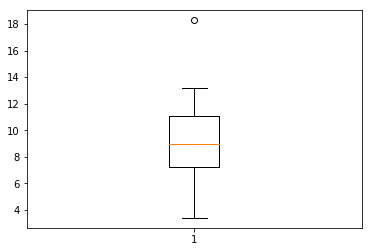

In [185]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('C:\\Users\\ROG\\Desktop\\contact session 1\\contact session 1\\code and datasets\\Pandas\\new_cars.csv')
df=df.drop_duplicates()
df=df.dropna()
#plt.hist(df['city mpg'])
df['rating']=0
df['city_kmpl']=df['city mpg']*0.4251
df['highway_kmpl']=df['highway MPG']*0.4251
df.drop(['city mpg','highway MPG'],axis=1,inplace=True)
df.columns=[column.replace(" ","_")for column in df.columns]
df['city_kmpl'].mean()

df['Driven_Wheels'].unique()
df['Driven_Wheels']=df['Driven_Wheels'].replace(to_replace='four wheel drive',value='all wheel drive')
df['Driven_Wheels'].unique()
df['milage_rating'] = df['city_kmpl'].apply(lambda kmpl: 2 if kmpl >= 8 else 0)
df['drs_rating'] = df['Number_of_Doors'].apply(lambda doors: 2 if doors >= 4 else 1)
df['transmission'] = df['Transmission_Type'].apply(lambda t: 1 if t =='MANUAL' else 0)
df['engn_hp'] = df['Engine_HP'].apply(lambda hp: 2 if hp <= 150 else 1)
def drv_rate(row):
    if row["Driven_Wheels"] == "real wheel drive":
        return 1
    elif row["Driven_Wheels"] == "all wheel drive":
        return 1
    else:
        return 2.5

df = df.assign(drv_rate=df.apply(drv_rate, axis=1))

df['total_rating']=df['milage_rating']+df['drs_rating']+df['transmission']+df['engn_hp']+df['drv_rate']
df2=df.sort_values('total_rating',ascending=False)
df2=df2.drop_duplicates(subset='Make', keep='first')
df2.drop(['milage_rating','drs_rating','transmission','engn_hp','drv_rate','rating',],axis=1,inplace=True)

plt.boxplot(df2['city_kmpl'])
df2.head()